## Importing

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import mean_squared_error as mse

import os


## Datasets Preparation (Training)

In [2]:
def datasets_preparation ():

     # Dataset and date    
     ds_name = ('/results2/SalishSea/nowcast-green.202111/' + i + '/SalishSea_1d_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]])+str(i[0:2]) + '_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]]) + str(i[0:2]) + '_grid_T.nc')

     ds_bio_name = ('/results2/SalishSea/nowcast-green.202111/' + i + '/SalishSea_1d_'  + '20' + str(i[5:7]) + str(dict_month[i[2:5]])+str(i[0:2]) + '_' + '20' + str(i[5:7]) + str(dict_month[i[2:5]]) + str(i[0:2]) + '_biol_T.nc')

     ds = xr.open_dataset (ds_name)
     ds_bio = xr. open_dataset (ds_bio_name)

     temp_i1 = (ds.votemper.where(mask==1)[0,0:15] * ds.e3t.where(mask==1)
               [0,0:15]).sum('deptht', skipna = True, min_count = 15) / mesh.gdepw_0[0,15]
     temp_i2 = (ds.votemper.where(mask==1)[0,15:27] * ds.e3t.where(mask==1)
               [0,15:27]).sum('deptht', skipna = True, min_count = 12) / (mesh.gdepw_0[0,27] - mesh.gdepw_0[0,14])
     saline_i1 = (ds.vosaline.where(mask==1)[0,0:15] * ds.e3t.where(mask==1)
                    [0,0:15]).sum('deptht', skipna = True, min_count = 15) / mesh.gdepw_0[0,15]
     saline_i2 = (ds.vosaline.where(mask==1)[0,15:27] * ds.e3t.where(mask==1)
                    [0,15:27]).sum('deptht', skipna = True, min_count = 12) / (mesh.gdepw_0[0,27] - mesh.gdepw_0[0,14])

     diat_i = (ds_bio.diatoms.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
               [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]
     flag_i = (ds_bio.flagellates.where(mask==1)[0,0:27] * ds.e3t.where(mask==1)
               [0,0:27]).sum('deptht', skipna = True, min_count = 27) / mesh.gdepw_0[0,27]

     return (temp_i1, temp_i2, saline_i1, saline_i2, diat_i, flag_i)


## Regressor

In [3]:
def regressor (inputs, targets, variable_name):
    
    inputs = inputs.transpose()
    
    # Regressor
    scale = preprocessing.StandardScaler()
    inputs2 = scale.fit_transform(inputs)
    X_train, X_test, y_train, y_test = train_test_split(inputs2, targets)

    extra_tree = ExtraTreeRegressor(criterion='poisson')
    regr = BaggingRegressor(extra_tree, n_estimators=10, max_features=4, n_jobs=-1).fit(X_train, y_train)

    outputs_test = regr.predict(X_test)

    m = scatter_plot(y_test, outputs_test, variable_name + ' (Testing dataset)') 
    r = np.round(np.corrcoef(y_test, outputs_test)[0][1],3)
    rms = np.round(mse(y_test, outputs_test),4)
    

    return (r, rms, m, regr)

# Printing

In [4]:
def printing (targets, outputs, m):

    print ('The amount of data points is', outputs.size)
    print ('The slope of the best fitting line is ', np.round(m,3))
    print ('The correlation coefficient is:', np.round(np.corrcoef(targets, outputs)[0][1],3))
    print (' The mean square error is:', np.round(mse(targets,outputs),5))


## Scatter Plot

In [5]:
def scatter_plot(targets, outputs, variable_name):

    # compute slope m and intercept b
    m, b = np.polyfit(targets, outputs, deg=1)

    printing (targets, outputs, m)
    
    fig, ax = plt.subplots()

    plt.scatter(targets,outputs, alpha = 0.2, s = 10)
    plt.xlabel('targets')
    plt.ylabel('outputs')

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # plot fitted y = m*x + b
    plt.axline(xy1=(0, b), slope=m, color='r')

    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    ax.plot(lims, lims,linestyle = '--',color = 'k')

    fig.suptitle(str(year) + ', ' + variable_name)

    plt.show()

    return (m)


## Plotting

In [13]:
def plotting (variable, name):

    plt.plot(years,variable, marker = '.', linestyle = '')
    plt.legend(['diatom','flagellate'])
    plt.xlabel('Years')
    plt.ylabel(name)
    plt.show()

## Main Body

Gathering days for year 2007
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.903
The correlation coefficient is: 0.955
 The mean square error is: 0.00227


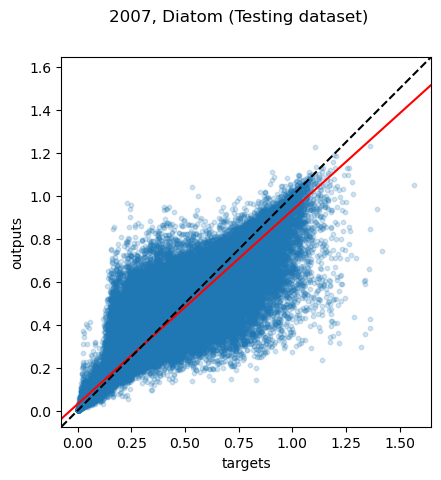

The amount of data points is 871482
The slope of the best fitting line is  0.959
The correlation coefficient is: 0.981
 The mean square error is: 3e-05


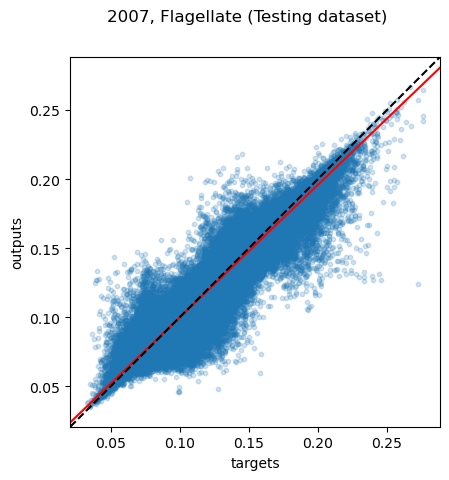

Gathering days for year 2008
Done gathering, building the prediction models


The amount of data points is 883101
The slope of the best fitting line is  0.891
The correlation coefficient is: 0.949
 The mean square error is: 0.00207


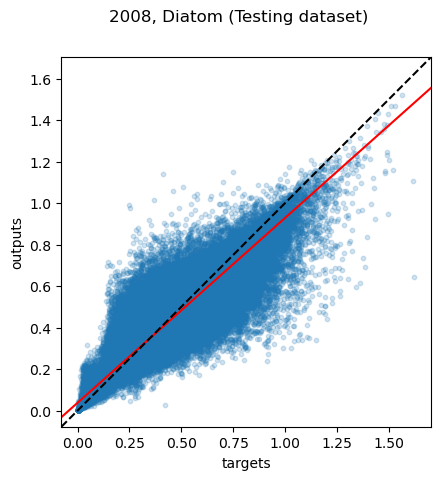

The amount of data points is 883101
The slope of the best fitting line is  0.945
The correlation coefficient is: 0.974
 The mean square error is: 4e-05


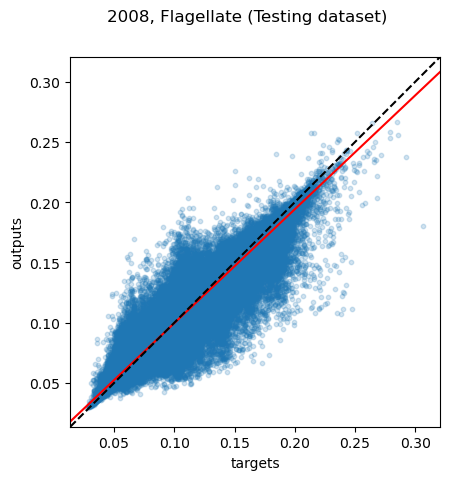

Gathering days for year 2009
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.875
The correlation coefficient is: 0.94
 The mean square error is: 0.00448


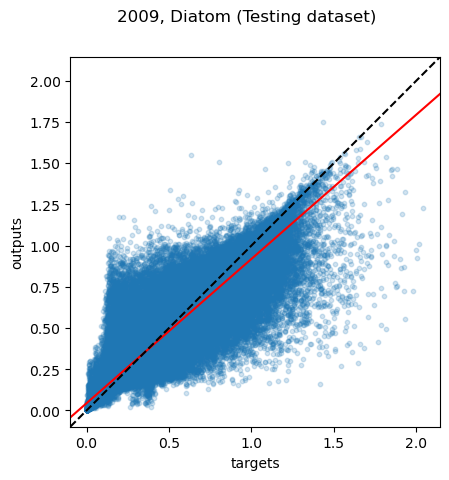

The amount of data points is 871482
The slope of the best fitting line is  0.933
The correlation coefficient is: 0.968
 The mean square error is: 5e-05


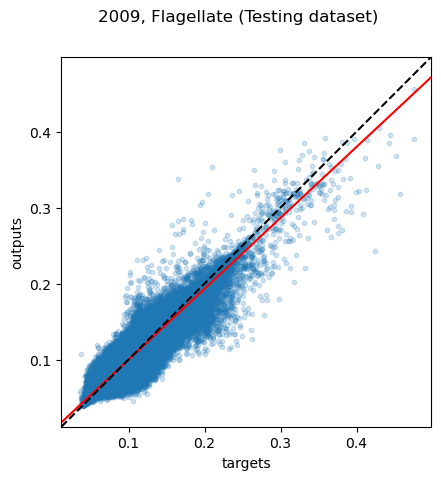

Gathering days for year 2010
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.836
The correlation coefficient is: 0.921
 The mean square error is: 0.00322


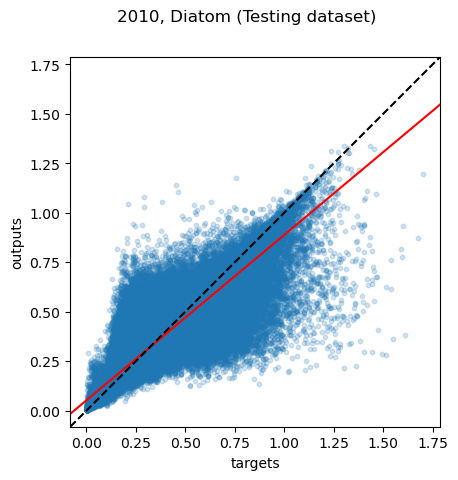

The amount of data points is 871482
The slope of the best fitting line is  0.923
The correlation coefficient is: 0.964
 The mean square error is: 5e-05


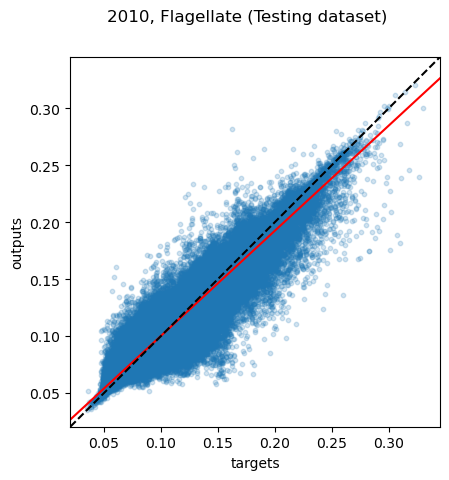

Gathering days for year 2011
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.91
The correlation coefficient is: 0.958
 The mean square error is: 0.002


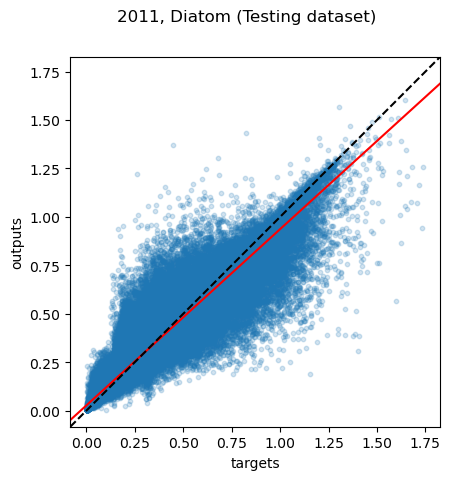

The amount of data points is 871482
The slope of the best fitting line is  0.941
The correlation coefficient is: 0.973
 The mean square error is: 4e-05


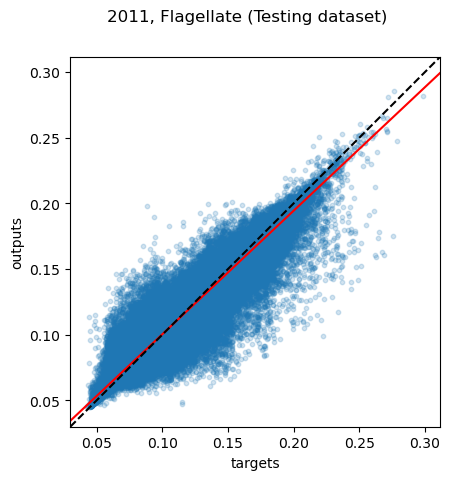

Gathering days for year 2012
Done gathering, building the prediction models


The amount of data points is 883101
The slope of the best fitting line is  0.887
The correlation coefficient is: 0.947
 The mean square error is: 0.00259


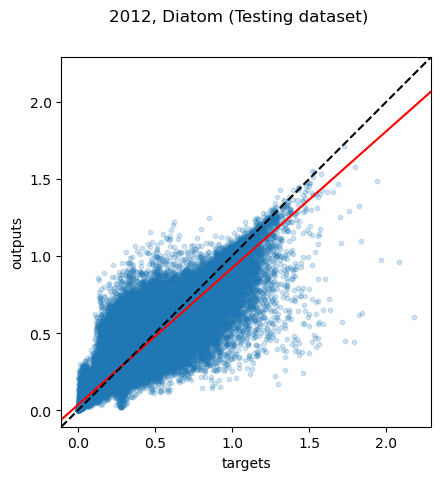

The amount of data points is 883101
The slope of the best fitting line is  0.944
The correlation coefficient is: 0.974
 The mean square error is: 4e-05


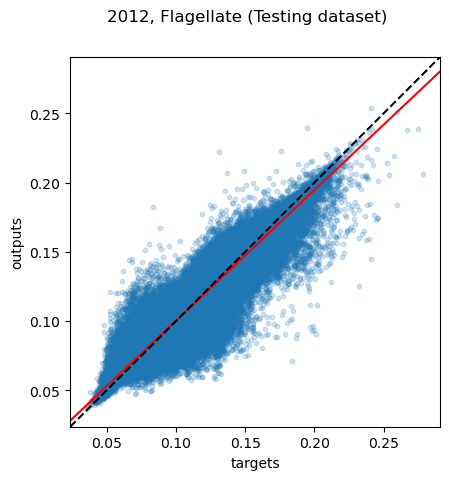

Gathering days for year 2013
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.848
The correlation coefficient is: 0.928
 The mean square error is: 0.00441


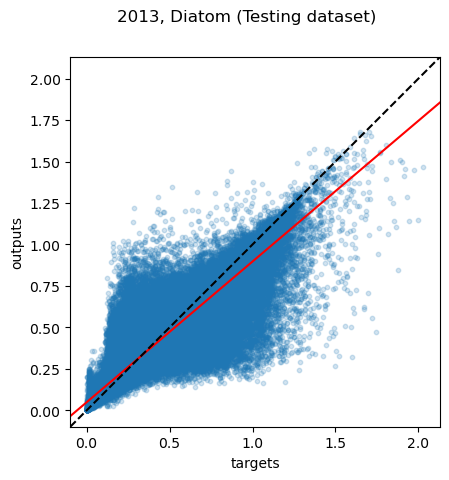

The amount of data points is 871482
The slope of the best fitting line is  0.948
The correlation coefficient is: 0.976
 The mean square error is: 3e-05


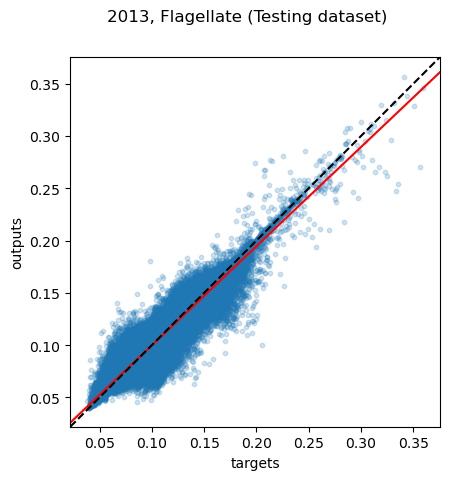

Gathering days for year 2014
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.854
The correlation coefficient is: 0.931
 The mean square error is: 0.00282


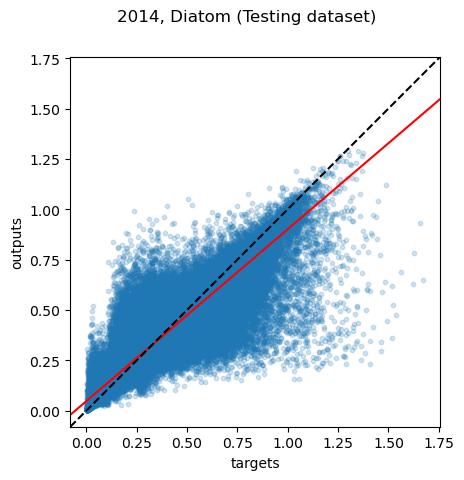

The amount of data points is 871482
The slope of the best fitting line is  0.961
The correlation coefficient is: 0.982
 The mean square error is: 3e-05


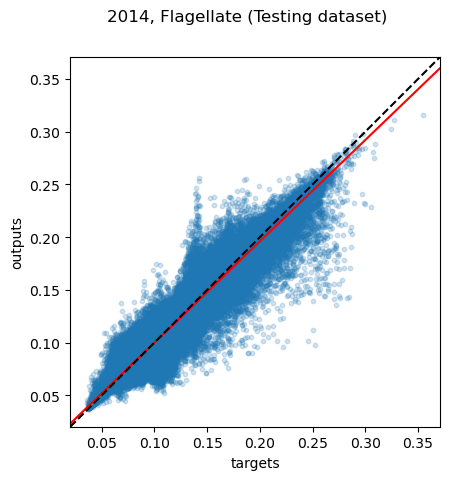

Gathering days for year 2015
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.804
The correlation coefficient is: 0.905
 The mean square error is: 0.0042


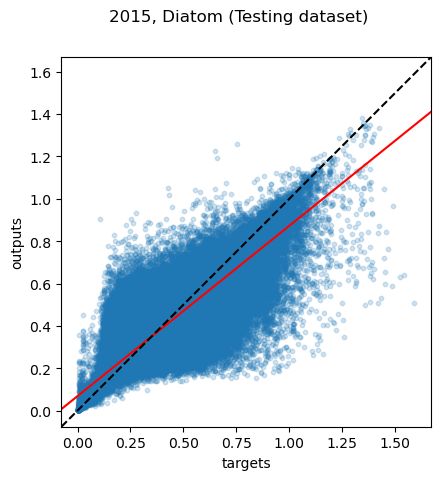

The amount of data points is 871482
The slope of the best fitting line is  0.926
The correlation coefficient is: 0.966
 The mean square error is: 3e-05


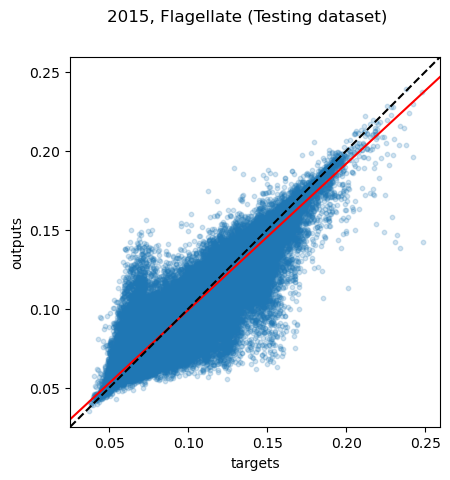

Gathering days for year 2016
Done gathering, building the prediction models


The amount of data points is 883101
The slope of the best fitting line is  0.885
The correlation coefficient is: 0.946
 The mean square error is: 0.00298


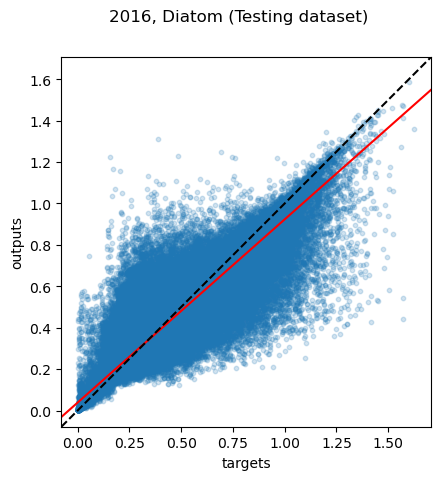

The amount of data points is 883101
The slope of the best fitting line is  0.938
The correlation coefficient is: 0.972
 The mean square error is: 3e-05


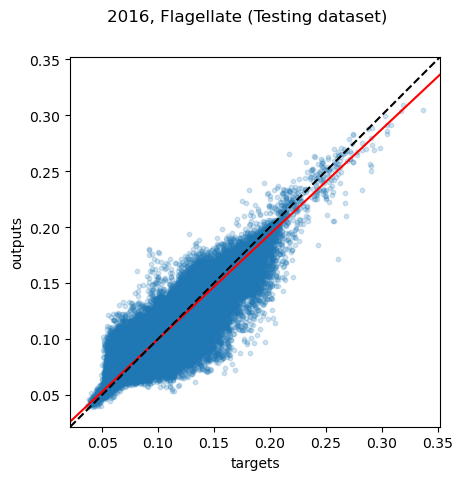

Gathering days for year 2017
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.889
The correlation coefficient is: 0.949
 The mean square error is: 0.00182


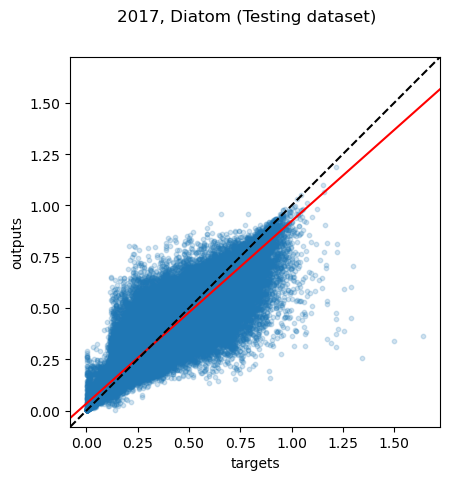

The amount of data points is 871482
The slope of the best fitting line is  0.937
The correlation coefficient is: 0.971
 The mean square error is: 4e-05


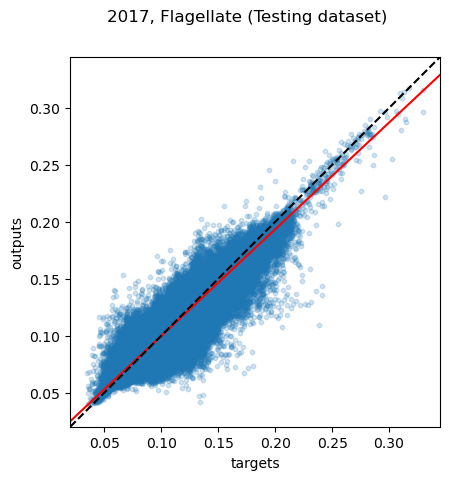

Gathering days for year 2018
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.851
The correlation coefficient is: 0.929
 The mean square error is: 0.00334


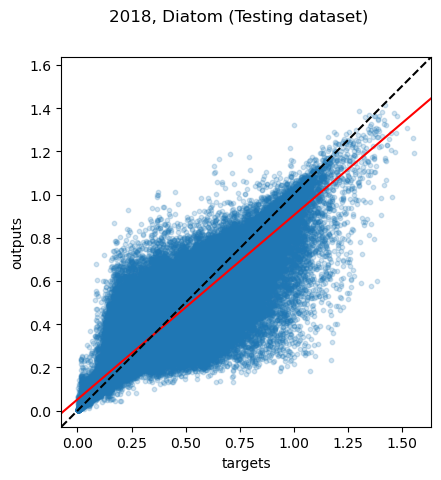

The amount of data points is 871482
The slope of the best fitting line is  0.952
The correlation coefficient is: 0.978
 The mean square error is: 3e-05


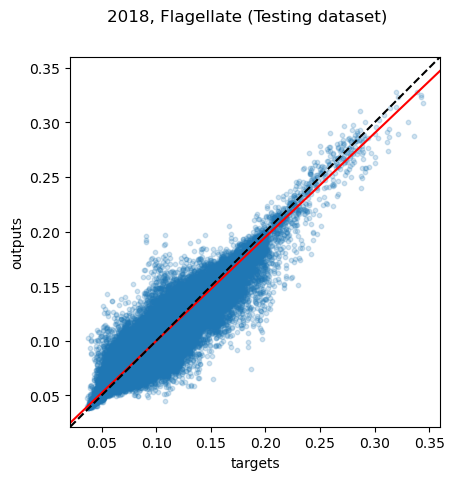

Gathering days for year 2019
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.811
The correlation coefficient is: 0.906
 The mean square error is: 0.00548


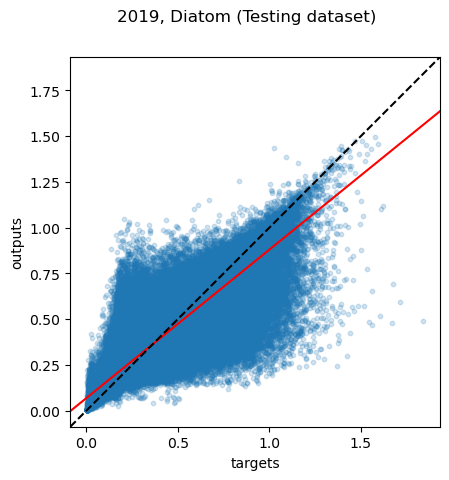

The amount of data points is 871482
The slope of the best fitting line is  0.942
The correlation coefficient is: 0.973
 The mean square error is: 4e-05


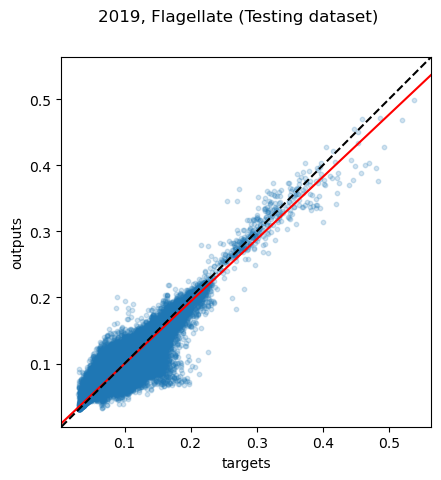

Gathering days for year 2020
Done gathering, building the prediction models


The amount of data points is 883101
The slope of the best fitting line is  0.857
The correlation coefficient is: 0.933
 The mean square error is: 0.00523


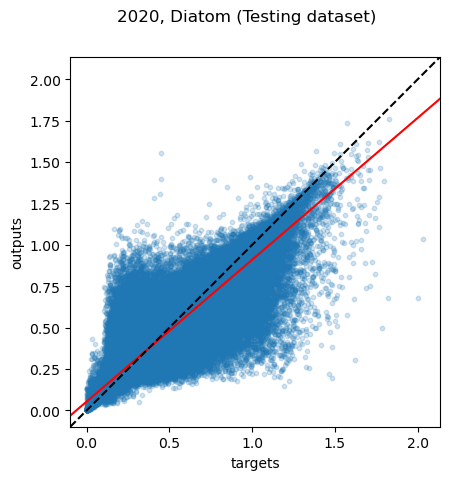

The amount of data points is 883101
The slope of the best fitting line is  0.931
The correlation coefficient is: 0.968
 The mean square error is: 7e-05


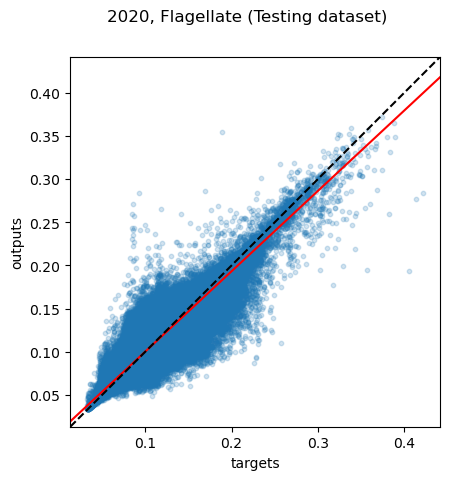

Gathering days for year 2021
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.908
The correlation coefficient is: 0.958
 The mean square error is: 0.00256


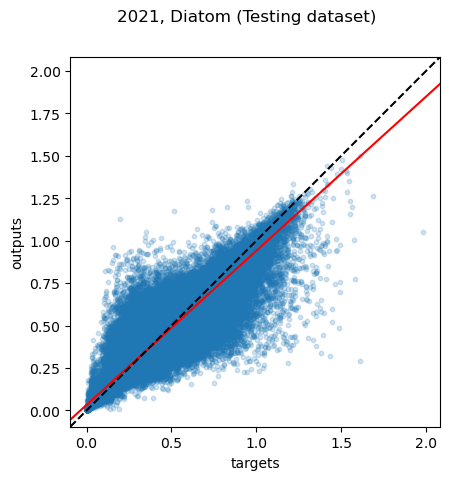

The amount of data points is 871482
The slope of the best fitting line is  0.952
The correlation coefficient is: 0.978
 The mean square error is: 3e-05


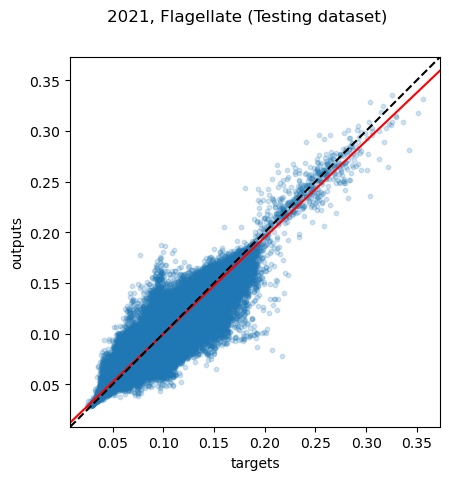

Gathering days for year 2022
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.884
The correlation coefficient is: 0.946
 The mean square error is: 0.00225


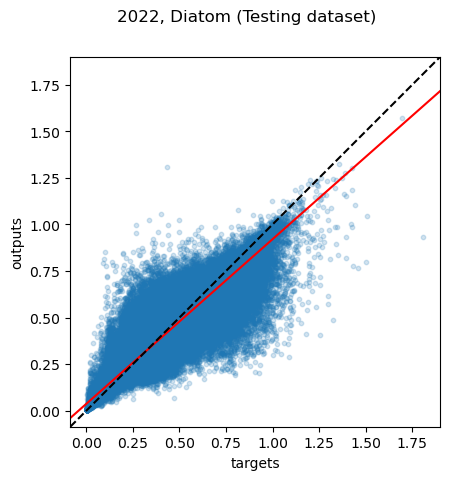

The amount of data points is 871482
The slope of the best fitting line is  0.943
The correlation coefficient is: 0.974
 The mean square error is: 3e-05


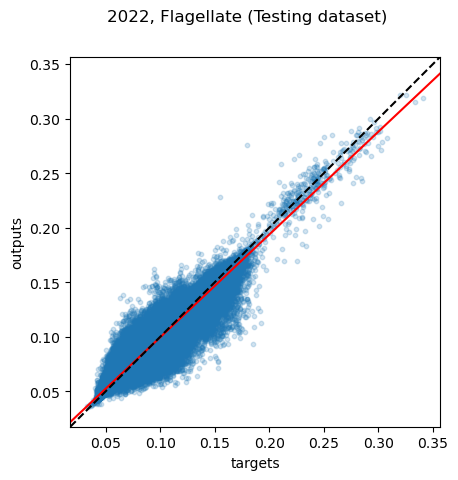

Gathering days for year 2023
Done gathering, building the prediction models


The amount of data points is 871482
The slope of the best fitting line is  0.865
The correlation coefficient is: 0.935
 The mean square error is: 0.00339


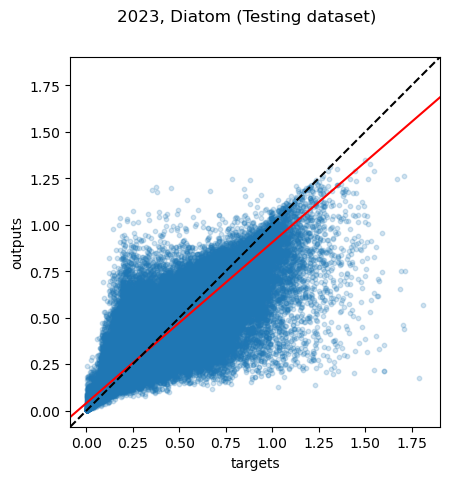

The amount of data points is 871482
The slope of the best fitting line is  0.945
The correlation coefficient is: 0.975
 The mean square error is: 5e-05


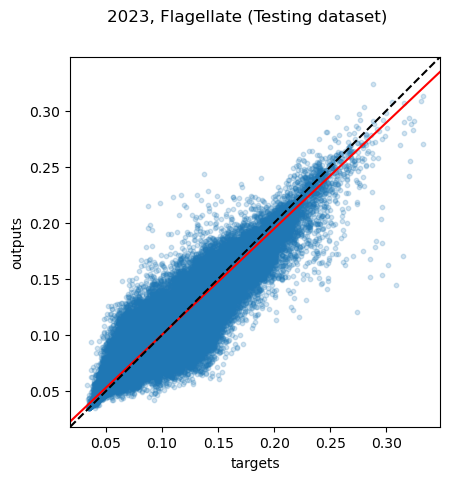

ValueError: x and y must have same first dimension, but have shapes (17,) and (2, 17)

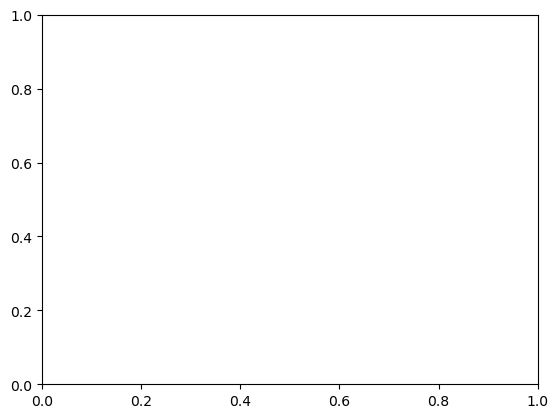

In [7]:
dict_month = {'jan': '01',
         'feb': '02',
         'mar': '03',
         'apr': '04',
         'may': '05',
         'jun': '06',
         'jul': '07',
         'aug': '08',
         'sep': '09',
         'oct': '10',
         'nov': '11',
         'dec': '12'}

path = os.listdir('/results2/SalishSea/nowcast-green.202111/')

years = range (2007,2024)

# Open the mesh mask
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
mask = mesh.tmask.to_numpy()

r_all = [],[]
rms_all = [],[]
slope_all = [],[]
regr_all = [],[]

for year in range (2007,2024):

    year_str = str(year)[2:4]

    folders = [x for x in path if ((x[2:5]=='mar' or x[2:5]=='apr' or (x[2:5]=='feb' and x[0:2] > '14')) and (x[5:7]==year_str))]
    indx_dates=(np.argsort(pd.to_datetime(folders, format="%d%b%y")))
    folders = [folders[i] for i in indx_dates]

    drivers_all = np.array([[],[],[],[]])
    diat_all = np.array([])
    flag_all = np.array([])

    print ('Gathering days for year ' + str(year))
    for i in folders:

        temp_i1, temp_i2, saline_i1, saline_i2, diat_i, flag_i = datasets_preparation()

        drivers = np.stack([np.ravel(temp_i1), np.ravel(temp_i2), np.ravel(saline_i1), np.ravel(saline_i2)])
        indx = np.where(~np.isnan(drivers).any(axis=0))
        drivers = drivers[:,indx[0]]
        drivers_all = np.concatenate((drivers_all,drivers),axis=1)

        diat = np.ravel(diat_i)
        diat = diat[indx[0]]
        diat_all = np.concatenate((diat_all,diat))

        flag = np.ravel(flag_i)
        flag = flag[indx[0]]
        flag_all = np.concatenate((flag_all,flag))

    print ('Done gathering, building the prediction models')
    print ('\n')

    r, rms, m, regr = regressor(drivers_all, diat_all, 'Diatom')
    r_all[0].append(r)
    rms_all[0].append(rms)
    slope_all[0].append(m)
    regr_all[0].append(regr)

    r, rms, m, regr = regressor(drivers_all, flag_all, 'Flagellate')
    r_all[1].append(r)
    rms_all[1].append(rms)
    slope_all[1].append(m)
    regr_all[1].append(regr)

plotting(r_all.transpose(), 'Correlation Coefficient')
plotting(rms_all, 'Mean Square Error')
plotting (slope_all, 'Slope of the best fitting line')


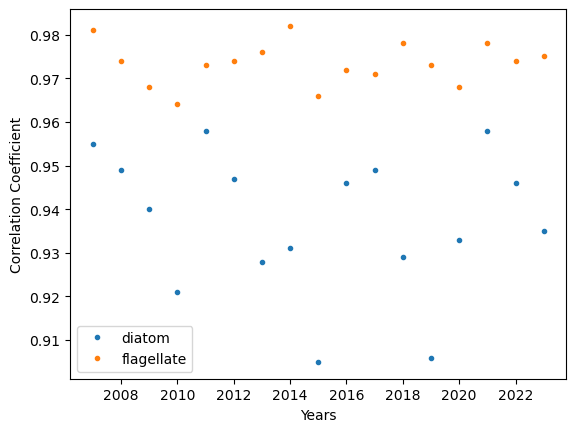

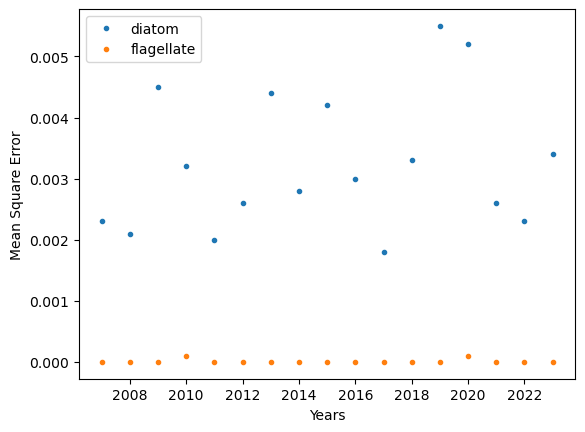

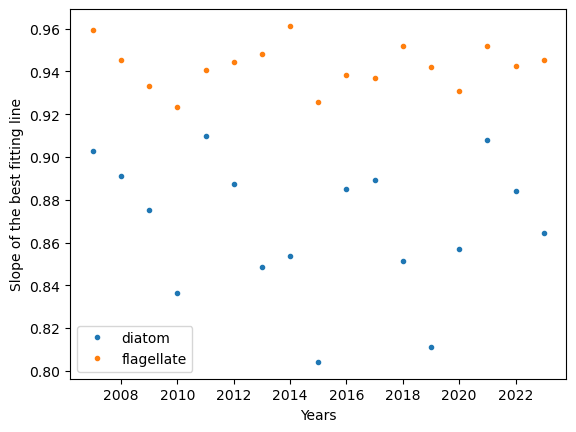

In [14]:
plotting(np.transpose(r_all), 'Correlation Coefficient')
plotting(np.transpose(rms_all), 'Mean Square Error')
plotting (np.transpose(slope_all), 'Slope of the best fitting line')